In [80]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

In [81]:
losses = torch.load('models/2_25_24_model_losses.pt')
print(losses)

[282090026.1762452, 132090828.50574712, 134592115.49425286, 126835666.88122605, 123271168.0, 124135540.72030652, 124642974.89655173, 122927571.86206897, 121120884.72030652, 121253282.81992337, 122835334.37547892, 123722412.6283525, 123691801.50191571, 123258122.78927203, 122967589.27203065, 122766398.77394636, 122399153.53256705, 121869239.41762452, 121584274.14559387, 121652551.60153256, 121877801.1954023, 121986655.14176245, 121892370.63601533, 121680006.37547892, 121432405.33333333, 121074087.72413793, 120754536.95019157, 120477435.09578544, 120412068.78160919, 120221667.55555555, 120170285.11877395, 120050571.27969348, 119823763.12643678, 119531161.99233717, 119208458.78927203, 118889490.63601533, 118597966.46743295, 118272552.21455939, 117902522.36015326, 117421005.97701149, 116548110.71264368, 114866764.50574712, 112973092.29118773, 110515179.40229885, 110419166.65134099, 110993850.36015326, 109734363.70881227, 108526536.09195402, 108451641.8697318, 108557785.74712643, 108359759.

Text(0, 0.5, 'Loss (MAE)')

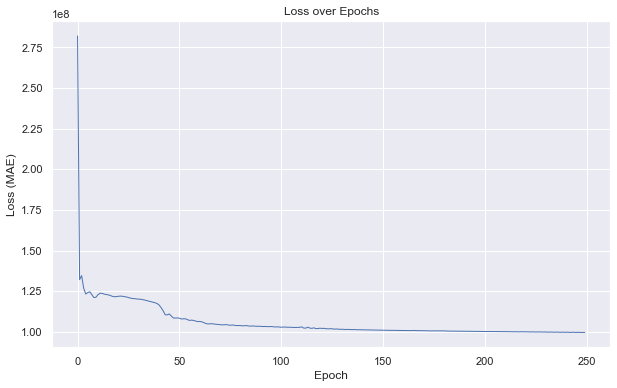

In [82]:
ax = sns.lineplot(losses, linewidth=1)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MAE)')


# Model Performance Visualizations

In [83]:
# Setup Model
from model import GCN

model = GCN()
model.load_state_dict(torch.load("models/2_25_24_model.pt"))
model = model.eval()

In [84]:
data = torch.load("datasets/SG256_From_Enzo_Cleaned_SM_Only_Train.pt")

y_truth = np.array([])
y_pred = np.array([])
for graph in data:
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])
    
    for item in graph.y:
        y_truth = np.append(y_truth, item)

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

print(len(y_pred), len(y_truth))
print(y_pred, y_truth)


10985 10985
[ 1171.94958496   714.60668945   640.29626465 ...  6563.40722656
 17416.1796875    154.6227417 ] [3350.70678711  506.71243286  506.71243286 ...  589.0291748   589.0291748
  664.12841797]


10985 10985


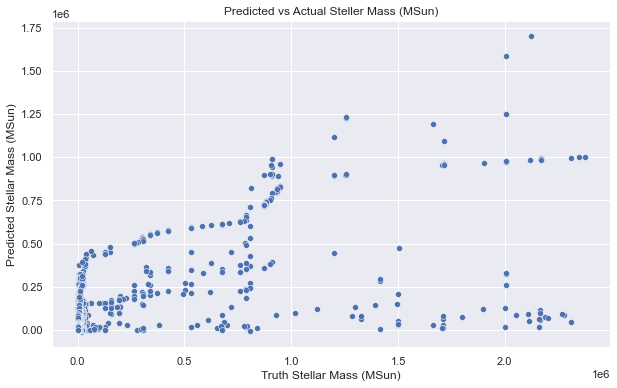

In [85]:
ax = sns.scatterplot(x=y_truth, y=y_pred)
print(len(y_truth), len(y_pred))
ax.set_title('Predicted vs Actual Steller Mass (MSun)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_ylabel('Predicted Stellar Mass (MSun)')
ax.autoscale(True)

Mean absolute error: 1257.2177224658362%


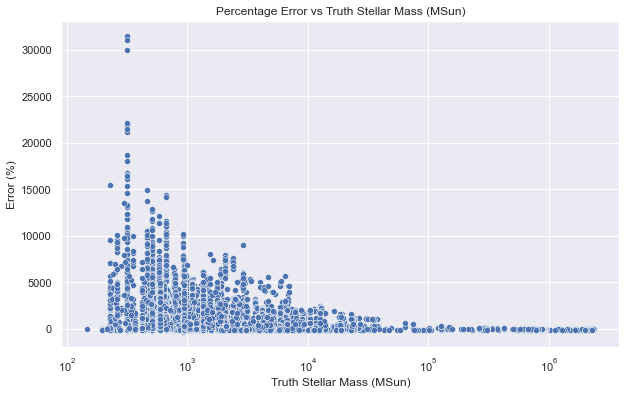

In [86]:
error = ((y_pred - y_truth) / y_truth) * 100
ax = sns.scatterplot(x=y_truth, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
print(f'Mean absolute error: {np.mean(np.abs(error))}%')